<a href="https://colab.research.google.com/github/muskan-cloud/Pytorch_deeplearning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch_workflow



In [ ]:
topics_covered = {1.:"data prepare and load",
                  2: "build model",
                  3: "fitting model to training data",
                  4: "making predictions and evaluating a model (infrerence)",
                  5: "saving a loading a model",
                  6: "putting it all together" }


# Imports

In [ ]:
import torch
from torch import nn #torch.nn contains all building blocks of neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

# Data Preparing & Loading
*  change data to numerical representation
*  build models to learn the patterns in numerical representation

To showcase this , let's create some known data using linear regression formula to make a straight line with known parameters.


In [ ]:
# create KNKOWN parameters

w = 0.7
b = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = w*X + b
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Splitting data into training and test data sets

In [ ]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

Visualizin' our data

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None ):
  # plots traingg,test data and compares predictions
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":14});

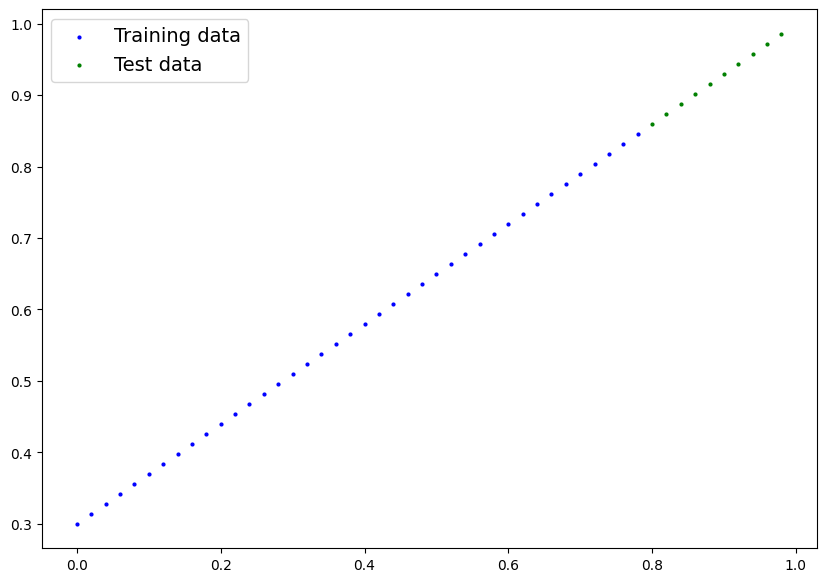

In [ ]:
plot_predictions();

# 2.Build Model


In [ ]:
# create Linear Regression Model class
class LinearRegressionModel(nn.Module):
  def __init__(self): #constructor
    super().__init__()
    #initialize model parameters
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad= True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype= torch.float ))
  def forward(self,x:torch.Tensor) -> torch.Tensor :
    return self.weights * x  + self.bias

### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their uses cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).


# Checking the contents of pytorch model
we can check the model parameters or what's inside using `.parameters()`.

In [ ]:
torch.manual_seed(42)

# create an instance of the model (this is a subcalss of nn.Module())
model_0 = LinearRegressionModel()

# checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

# Making Predictions using `torch.inference_mode()`


In [ ]:
with torch.inference_mode():#turns off gradients tracking
  y_preds = model_0(X_test)

# with torch.no_grad():#we can also use this but inference mode is prefred
#   y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

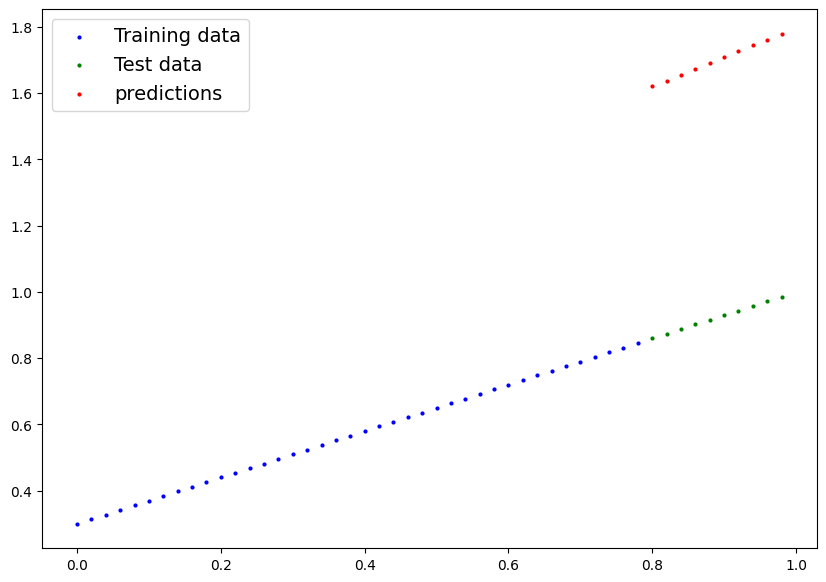

In [ ]:
plot_predictions(predictions=y_preds);

#3.Training a model with pytorch(intuition building)

--> to change from poor representation of data to better representation of data.

-->one way to measure how poor or wrong your models predictions are is to use a loss function.

--> optimizer takes into account the loss of model and adjusts the model's parameters (e.g weight and bias in our case) to improve the loss function

And for pytorch we need :


* a training loop
* a testing loop



In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (SGD)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)

# Building a training and testing loop in Pytotch

*  Loop through the data
*  Forward Pass / propogation
*  Calculate the loss
*  opimizer zero grad
*  loss backward
*  optimization step






In [ ]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

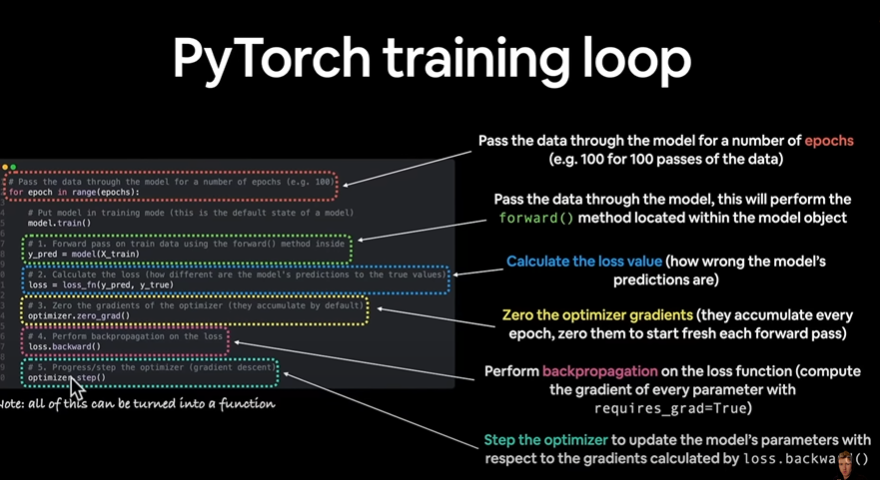

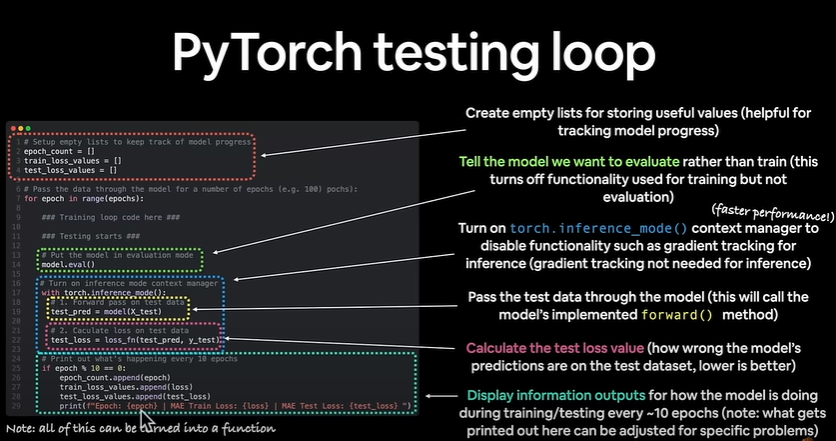

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
torch.manual_seed(42)

epochs = 85
# tracking different values
epoch_count = []
loss_values = []
test_loss_values = []
##training
for epoch in range(epochs):#loop through the data
  model_0.train()#training in pytorch sets all params that requires grad to require grad
  #1.FORWARD PASS
  y_pred = model_0(X_train)

  #2.calculate the loss
  loss = loss_fn(y_pred,y_train)
  # print(f'loss = ',loss)

  # 3. optimizer zero grad
  # (The optimizers gradients are set to zero (they are accumulated by default)
  # so they can be recalculated for the specific training step.)
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()

  ##testing
  model_0.eval()#turns off settings that are not needed for  evLUATION (for eg : dropout)
  with torch.inference_mode():
    # forward pass
    test_pred = model_0(X_test)
    # calculate loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss : {loss} | Test Loss: {test_loss}")

  elif epoch >= 81:
    print(f"Epoch: {epoch} | Loss : {loss} | Test Loss: {test_loss}")
# print model state_dict
print(f"Epoch: {epoch} | Loss : {loss} | Test Loss: {test_loss}")
print(model_0.state_dict())

Epoch: 0 | Loss : 0.6860889196395874 | Test Loss: 0.7637526988983154
Epoch: 10 | Loss : 0.5708791017532349 | Test Loss: 0.6290428042411804
Epoch: 20 | Loss : 0.45566922426223755 | Test Loss: 0.4943329691886902
Epoch: 30 | Loss : 0.34045934677124023 | Test Loss: 0.35962313413619995
Epoch: 40 | Loss : 0.2252494841814041 | Test Loss: 0.2249133139848709
Epoch: 50 | Loss : 0.1100396141409874 | Test Loss: 0.09020347893238068
Epoch: 60 | Loss : 0.009724985808134079 | Test Loss: 0.020998019725084305
Epoch: 70 | Loss : 0.006216754671186209 | Test Loss: 0.014099234715104103
Epoch: 80 | Loss : 0.002788322512060404 | Test Loss: 0.005826681852340698
Epoch: 81 | Loss : 0.0024408488534390926 | Test Loss: 0.004724687431007624
Epoch: 82 | Loss : 0.002099317265674472 | Test Loss: 0.004309558775275946
Epoch: 83 | Loss : 0.0017560191918164492 | Test Loss: 0.0025295913219451904
Epoch: 84 | Loss : 0.001492114388383925 | Test Loss: 0.00495107751339674
Epoch: 84 | Loss : 0.001492114388383925 | Test Loss: 0.00

Text(0.5, 0, 'epochs')

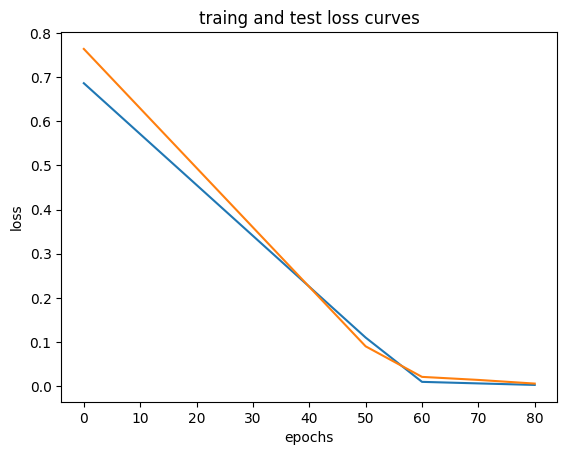

In [ ]:
# plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy() , label ="train loss")
plt.plot(epoch_count, test_loss_values, label ="test loss")
plt.title("traing and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")

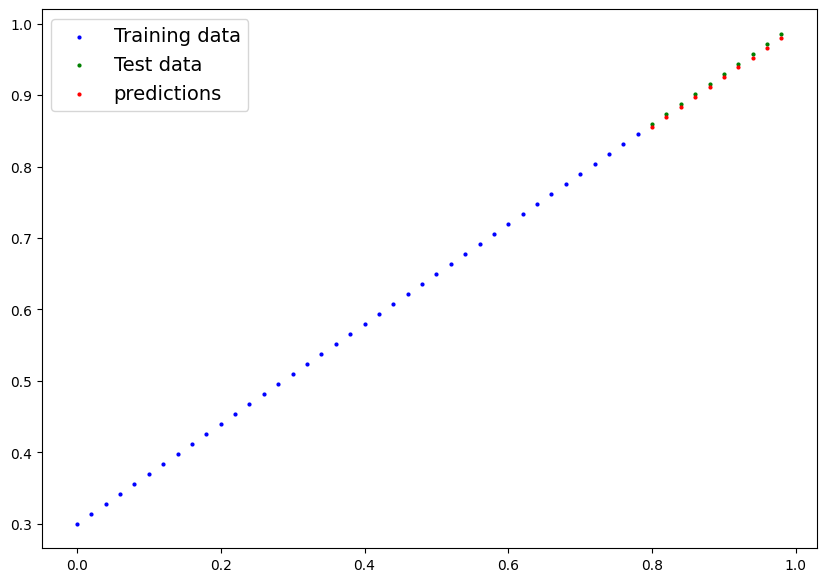

In [ ]:
plot_predictions(predictions = test_pred)

# Saving a Model in PyTorch

Methods for saving and loading:
* 1.`torch.save` allows to save model in python's pickle format.
* 2.`torch.load` allows to load a saved model.
* 3.`torch.nn.Module.load_state_dict()` allows to load a model's saved state dictionary.

In [ ]:
# saving our pytorch model
from pathlib import Path

# 1. create model directory
Model_path = Path("models")
Model_path.mkdir(parents=True,exist_ok=True)

# 2. create model save path
Model_name = "01_pytorch_workflow_0.pth"
MODEL_SAVE_PATH = Model_path / Model_name

# 3. save the model stae dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),f = MODEL_SAVE_PATH)



Saving model to : models/01_pytorch_workflow_0.pth


In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 1580 Jan  6 19:32 01_pytorch_workflow_0.pth


# Loading a pytorch model
since we saved our model `state_dict` rather than entire model , we'll create a new instance of our model class and load the saved `state_dict` into that.


In [ ]:
# to Load in a saved state_dict we have to intantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#  Load our saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6939])), ('bias', tensor([0.3005]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8556],
        [0.8695],
        [0.8834],
        [0.8972],
        [0.9111],
        [0.9250],
        [0.9389],
        [0.9527],
        [0.9666],
        [0.9805]])

In [ ]:
# compare loaded model preds with original model preds
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

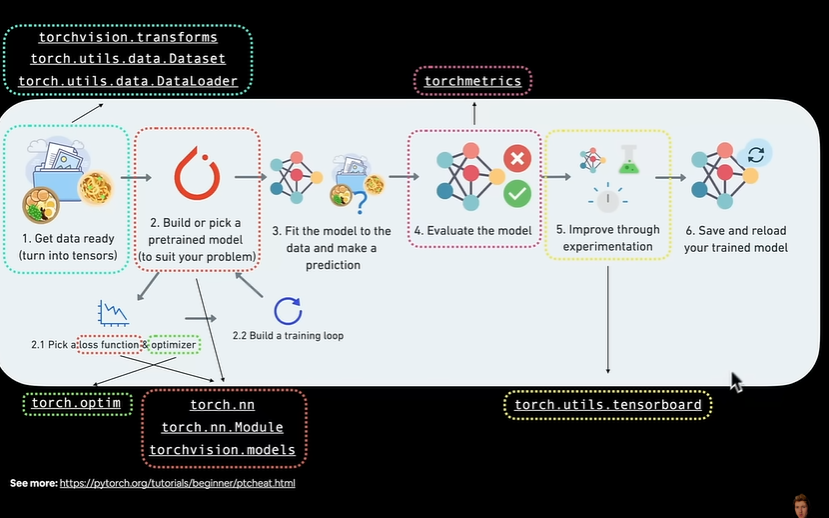

# Putting it all together

In [ ]:
# setting device agnoustic
device = "cuda" if torch.cuda.is_available()  else "cpu"
print(f"Using device: { device}")

Using device: cpu


In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

## 6.1 Data

In [ ]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias
X.shape,y.shape
# X[:100],y[:100]

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
# split data
train_split = int(0.8 * (len(X)))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None ):
  # plots traingg,test data and compares predictions
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":14});

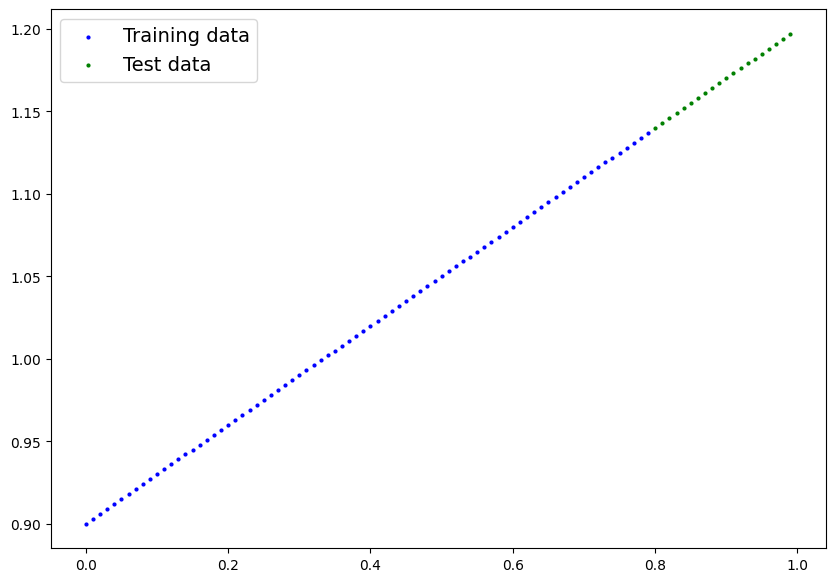

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModel_V2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModel_V2()
model_1, model_1.state_dict()

(LinearRegressionModel_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## training


In [ ]:
# loss function
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params =  model_1.parameters() ,lr = 0.01)


In [ ]:
# training loop
torch.manual_seed(42)

epochs = 301

# put data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_pred = model_1(X_train)

  # calculate the loss
  loss = loss_fn(y_pred,y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # perform backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  ## testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)

    test_loss = loss_fn(test_preds,y_test)

  if epoch % 20 == 0:
    print(f"epoch : { epoch } | Loss : { loss } | Test_loss : { test_loss }")



epoch : 0 | Loss : 0.12756133079528809 | Test_loss : 0.33650320768356323
epoch : 20 | Loss : 0.08187223970890045 | Test_loss : 0.2184026539325714
epoch : 40 | Loss : 0.07207288593053818 | Test_loss : 0.17458662390708923
epoch : 60 | Loss : 0.06507987529039383 | Test_loss : 0.15310418605804443
epoch : 80 | Loss : 0.05822876840829849 | Test_loss : 0.1367770880460739
epoch : 100 | Loss : 0.05137667804956436 | Test_loss : 0.12079393863677979
epoch : 120 | Loss : 0.044525571167469025 | Test_loss : 0.10446684062480927
epoch : 140 | Loss : 0.037674423307180405 | Test_loss : 0.08813951164484024
epoch : 160 | Loss : 0.03082224354147911 | Test_loss : 0.0721558928489685
epoch : 180 | Loss : 0.02397105097770691 | Test_loss : 0.055828340351581573
epoch : 200 | Loss : 0.01711984910070896 | Test_loss : 0.03950077295303345
epoch : 220 | Loss : 0.010267667472362518 | Test_loss : 0.02351721003651619
epoch : 240 | Loss : 0.0034169009886682034 | Test_loss : 0.007191836833953857
epoch : 260 | Loss : 0.0078

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3068]])),
             ('linear_layer.bias', tensor([0.9010]))])

In [ ]:
weight,bias

(0.3, 0.9)

In [ ]:
# turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[1.1464],
        [1.1495],
        [1.1526],
        [1.1556],
        [1.1587],
        [1.1618],
        [1.1648],
        [1.1679],
        [1.1710],
        [1.1740],
        [1.1771],
        [1.1802],
        [1.1832],
        [1.1863],
        [1.1894],
        [1.1924],
        [1.1955],
        [1.1986],
        [1.2016],
        [1.2047]])

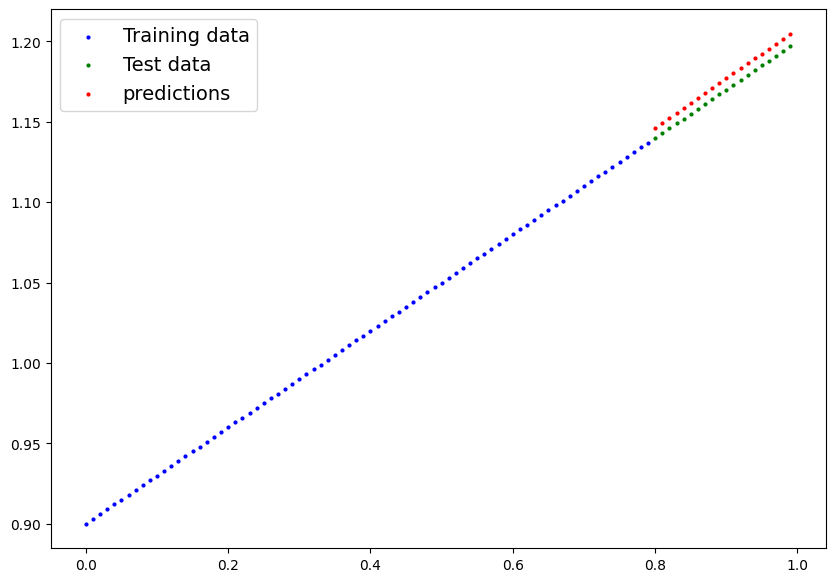

In [ ]:
plot_predictions(predictions=y_preds.cpu())

## saving and loading model

In [ ]:
from pathlib import Path
# create models directory
Model_path = Path("models")
Model_path.mkdir(parents=True,exist_ok=True)

# create model save path
Model_name = "01_pytorch_workflow_model_1.pth"
Model_save_path = Model_path/Model_name

# savre the model
print("saving the model at",Model_save_path)
torch.save(obj = model_1.state_dict(),f = Model_save_path)

saving the model at models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3068]])),
             ('linear_layer.bias', tensor([0.9010]))])

In [ ]:
# Load a pytorch model

loaded_model_1 = LinearRegressionModel_V2()

# Load the saved model_state_dict
loaded_model_1.load_state_dict(torch.load(f=Model_save_path))

loaded_model_1.to(device)

LinearRegressionModel_V2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3068]])),
             ('linear_layer.bias', tensor([0.9010]))])

In [ ]:
# Evaluate Loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])